In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("matches.csv")
df.head()

,Season,Tour,Date,Time,Opponent,HoAw,ArsenalScore,OpponentScore,Stadium,Attendance,Coach,Referee
0,2017/18,1,2017-08-11,20:45:00,Leicester,home,4,3,Emirates Stadium,59387,Arsène Wenger,Mike Dean
1,2017/18,2,2017-08-19,18:30:00,Stoke City,away,0,1,bet365 Stadium,29459,Arsène Wenger,Andre Marriner
2,2017/18,3,2017-08-27,17:00:00,Liverpool,away,0,4,Anfield,53206,Arsène Wenger,Craig Pawson
3,2017/18,4,2017-09-09,16:00:00,Bournemouth,home,3,0,Emirates Stadium,59262,Arsène Wenger,Anthony Taylor
4,2017/18,5,2017-09-17,14:30:00,Chelsea,away,0,0,Stamford Bridge,41478,Arsène Wenger,Michael Oliver


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Season         214 non-null    object
 1   Tour           214 non-null    int64 
 2   Date           214 non-null    object
 3   Time           214 non-null    object
 4   Opponent       214 non-null    object
 5   HoAw           214 non-null    object
 6   ArsenalScore   214 non-null    int64 
 7   OpponentScore  214 non-null    int64 
 8   Stadium        214 non-null    object
 9   Attendance     214 non-null    int64 
 10  Coach          214 non-null    object
 11  Referee        214 non-null    object
dtypes: int64(4), object(8)
memory usage: 20.2+ KB


In [4]:
df["Date"]=pd.to_datetime(df["Date"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Season         214 non-null    object        
 1   Tour           214 non-null    int64         
 2   Date           214 non-null    datetime64[ns]
 3   Time           214 non-null    object        
 4   Opponent       214 non-null    object        
 5   HoAw           214 non-null    object        
 6   ArsenalScore   214 non-null    int64         
 7   OpponentScore  214 non-null    int64         
 8   Stadium        214 non-null    object        
 9   Attendance     214 non-null    int64         
 10  Coach          214 non-null    object        
 11  Referee        214 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 20.2+ KB


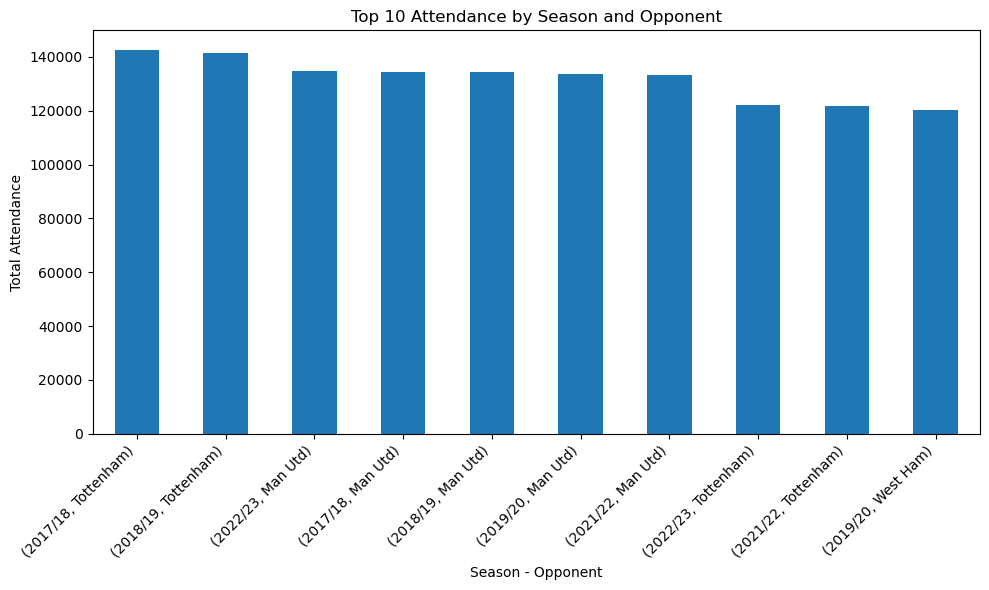

In [6]:
# Assuming your DataFrame is named 'df'
# Grouping data by season and opponent, then summing the attendance
attendance_by_season_opponent = df.groupby(['Season', 'Opponent'])['Attendance'].sum()

# Sorting the data by attendance in descending order
sorted_attendance = attendance_by_season_opponent.sort_values(ascending=False)

# Selecting the top 10 combinations
top_10_attendance = sorted_attendance.head(10)

# Plotting the bar chart
top_10_attendance.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Attendance by Season and Opponent')
plt.xlabel('Season - Opponent')
plt.ylabel('Total Attendance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

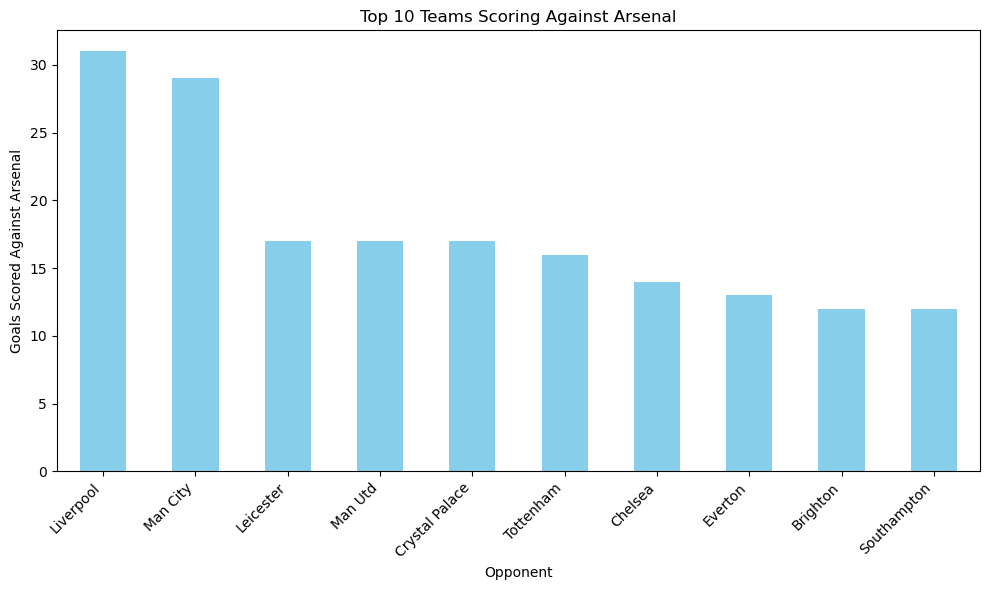

In [7]:
# Grouping data by opponent and summing the goals scored against Arsenal
goals_against_arsenal = df.groupby('Opponent')['OpponentScore'].sum()

# Sorting the data by goals scored against Arsenal in descending order
sorted_goals = goals_against_arsenal.sort_values(ascending=False)

# Selecting the top 10 teams
top_10_goals = sorted_goals.head(10)

# Plotting the bar chart
top_10_goals.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Teams Scoring Against Arsenal')
plt.xlabel('Opponent')
plt.ylabel('Goals Scored Against Arsenal')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

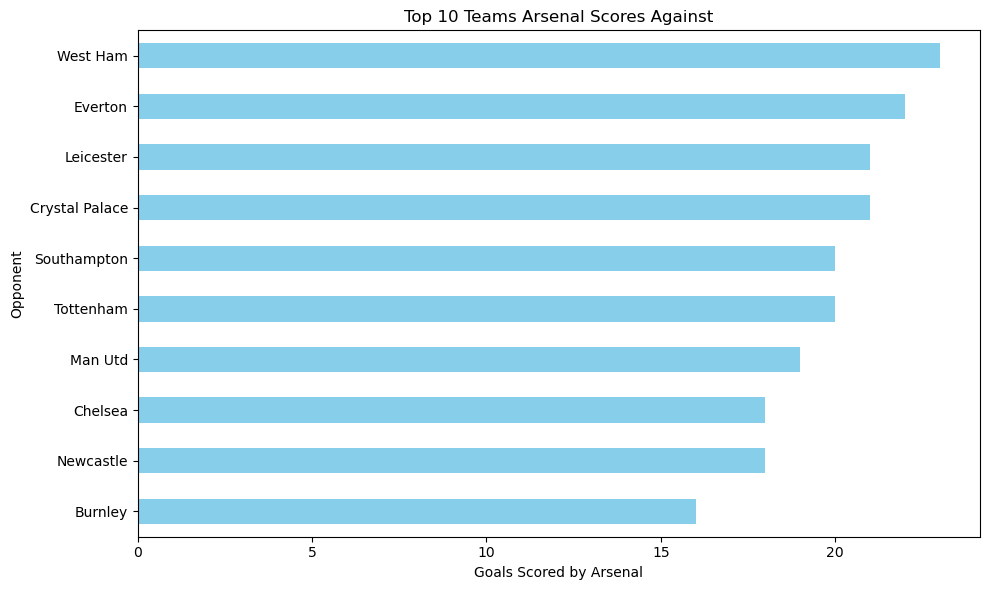

In [8]:
# Grouping data by opponent and summing the goals scored by Arsenal
goals_scored_by_arsenal = df.groupby('Opponent')['ArsenalScore'].sum()

# Sorting the data by goals scored by Arsenal in descending order
sorted_goals_scored = goals_scored_by_arsenal.sort_values(ascending=False)

# Selecting the top 10 teams
top_10_goals_scored = sorted_goals_scored.head(10)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
top_10_goals_scored.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Teams Arsenal Scores Against')
plt.xlabel('Goals Scored by Arsenal')
plt.ylabel('Opponent')
plt.tight_layout()
plt.show()

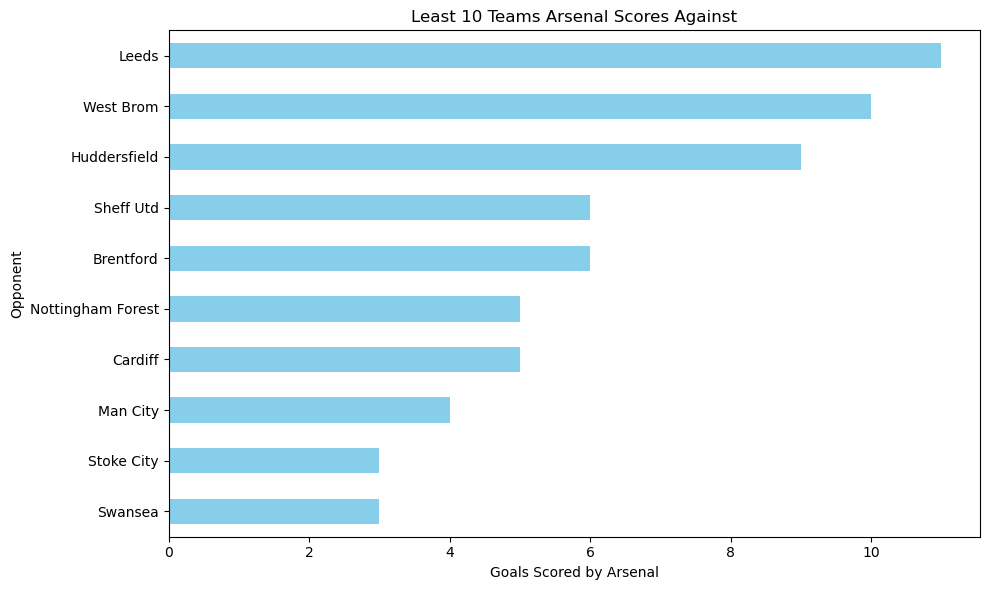

In [9]:
# Grouping data by opponent and summing the goals scored by Arsenal
goals_scored_by_arsenal = df.groupby('Opponent')['ArsenalScore'].sum()

# Sorting the data by goals scored by Arsenal in ascending order to get the least scored against teams
sorted_goals_scored = goals_scored_by_arsenal.sort_values()

# Selecting the least 10 teams
least_10_goals_scored = sorted_goals_scored.head(10)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
least_10_goals_scored.plot(kind='barh', color='skyblue')
plt.title('Least 10 Teams Arsenal Scores Against')
plt.xlabel('Goals Scored by Arsenal')
plt.ylabel('Opponent')
plt.tight_layout()
plt.show()

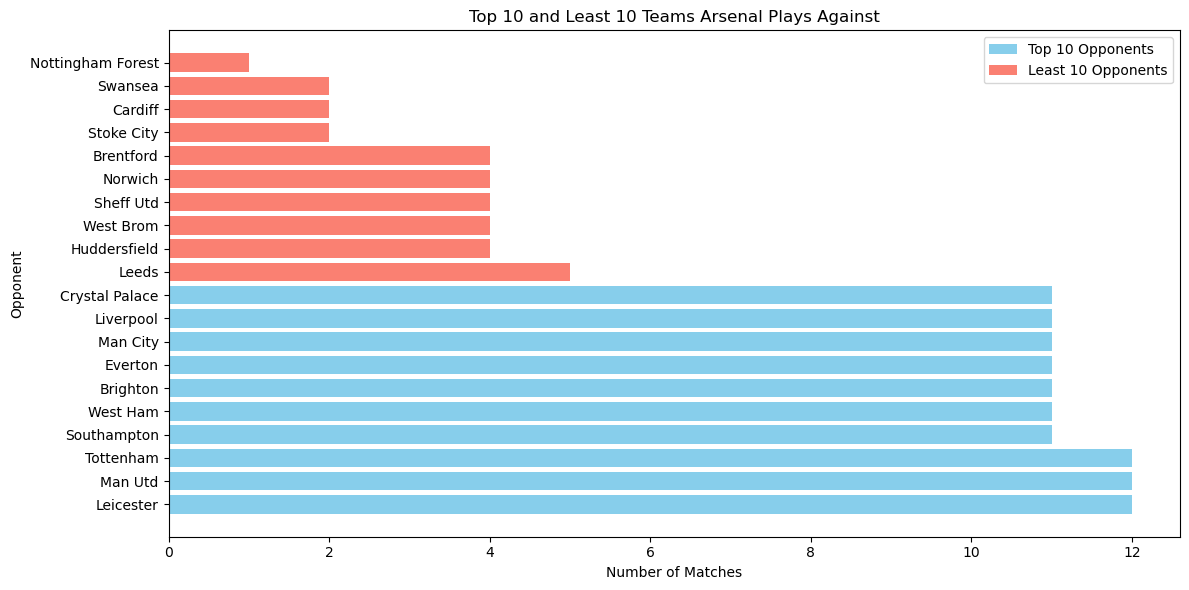

In [10]:
# Counting the number of matches against each opponent
matches_count = df['Opponent'].value_counts()

# Sorting opponents by the number of matches in descending order
sorted_matches = matches_count.sort_values(ascending=False)

# Selecting the top 10 and least 10 opponents
top_10_opponents = sorted_matches.head(10)
least_10_opponents = sorted_matches.tail(10)

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))

# Plotting the top 10 opponents
plt.barh(top_10_opponents.index, top_10_opponents, color='skyblue', label='Top 10 Opponents')

# Plotting the least 10 opponents
plt.barh(least_10_opponents.index, least_10_opponents, color='salmon', label='Least 10 Opponents')

plt.xlabel('Number of Matches')
plt.ylabel('Opponent')
plt.title('Top 10 and Least 10 Teams Arsenal Plays Against')
plt.legend()
plt.tight_layout()
plt.show()


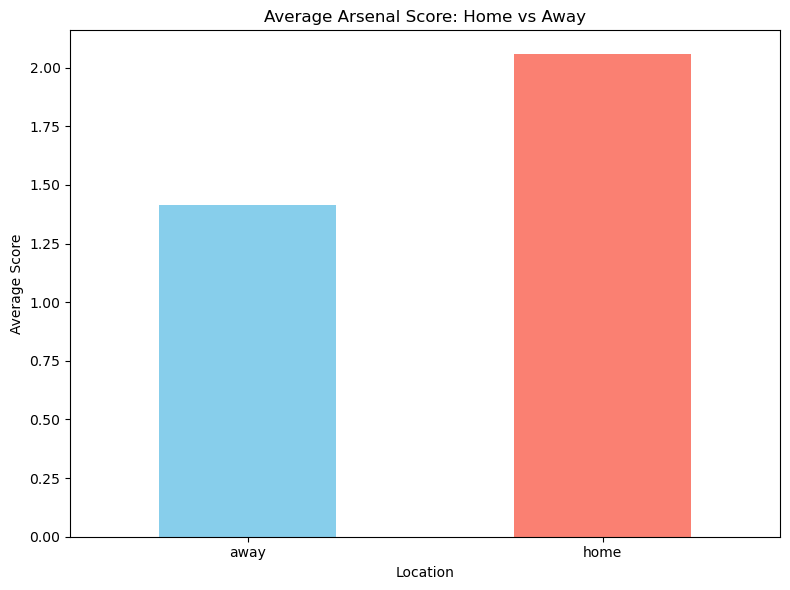

In [12]:
# Grouping data by 'HoAw' (Home or Away) and calculating the average Arsenal score
average_scores = df.groupby('HoAw')['ArsenalScore'].mean()

# Plotting the grouped bar chart
plt.figure(figsize=(8, 6))
average_scores.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Arsenal Score: Home vs Away')
plt.xlabel('Location')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

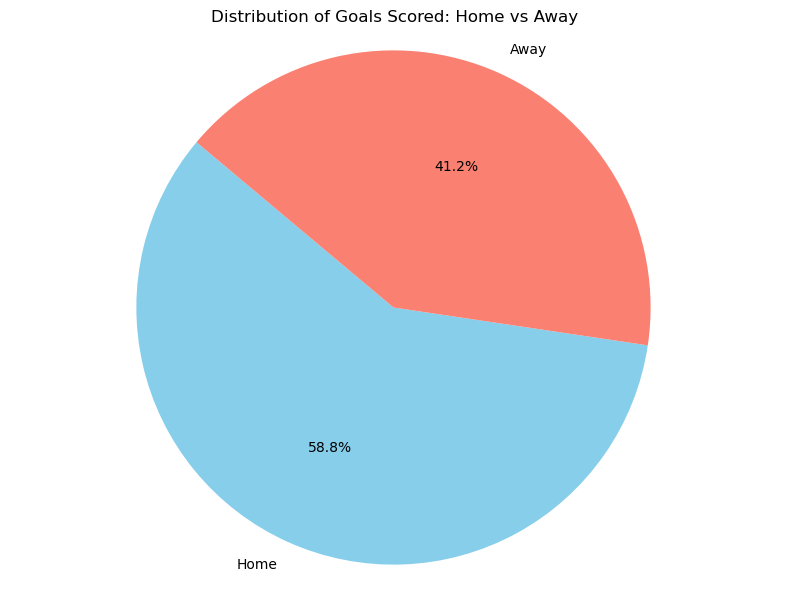

In [15]:
# Counting the total goals scored at home and away
goals_home = df[df['HoAw'] == 'home']['ArsenalScore'].sum()
goals_away = df[df['HoAw'] == 'away']['ArsenalScore'].sum()

# Creating data for the pie chart
goals_data = [goals_home, goals_away]
labels = ['Home', 'Away']
colors = ['skyblue', 'salmon']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(goals_data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Goals Scored: Home vs Away')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

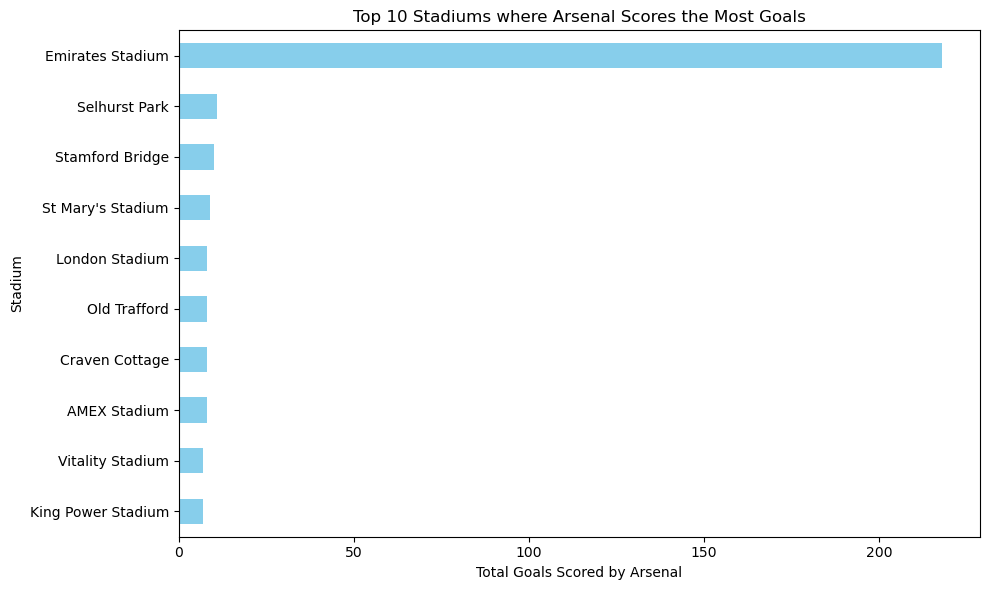

In [17]:
# Grouping data by stadium and summing the goals scored by Arsenal
goals_scored_by_stadium = df.groupby('Stadium')['ArsenalScore'].sum()

# Sorting the data by goals scored by Arsenal in descending order
sorted_goals_scored = goals_scored_by_stadium.sort_values(ascending=False)

# Selecting the top 10 stadiums
top_10_stadiums = sorted_goals_scored.head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_10_stadiums.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Stadiums where Arsenal Scores the Most Goals')
plt.xlabel('Total Goals Scored by Arsenal')
plt.ylabel('Stadium')
plt.tight_layout()
plt.show()
